In [1]:
from rockpool.nn.combinators import Sequential
from rockpool.nn.modules import LinearTorch, LIFNeuronTorch
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [2]:
d0 = [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
d = []
for t in d0:
    d.append(t)
    for i in range(9):
        d.append(0)
d = torch.tensor(d).unsqueeze(1).float()
len(d)

1000

In [3]:
c = Sequential(
    LinearTorch((1, 1), bias=False),
    LIFNeuronTorch(
        1,
        tau_mem=1/400,
        threshold=.1,
        dt=0.0001,
    ),
)
c[0].weight.data.fill_(.04)
c

/Users/dylan/SynSense Dropbox/Dylan Muir/LiveSync/Development/Projects/nir/rockpool_nir/rockpool/nn/modules/torch/torch_module.py:258: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  super().register_parameter(key, nn.Parameter(torch.tensor(value.data)))


TorchSequential  with shape (1, 1) {
    LinearTorch '0_LinearTorch' with shape (1, 1)
    LIFNeuronTorch '1_LIFNeuronTorch' with shape (1,)
}

In [4]:
zs, _, rec_state = c(d, record = True)
zs = zs.detach().numpy()[0]
vs = rec_state['1_LIFNeuronTorch']['vmem'].detach().numpy()[0]


In [5]:
pd.DataFrame(np.concatenate([d, vs, zs], axis=1)).to_csv("lif_rockpool.csv", index=False, header=False)

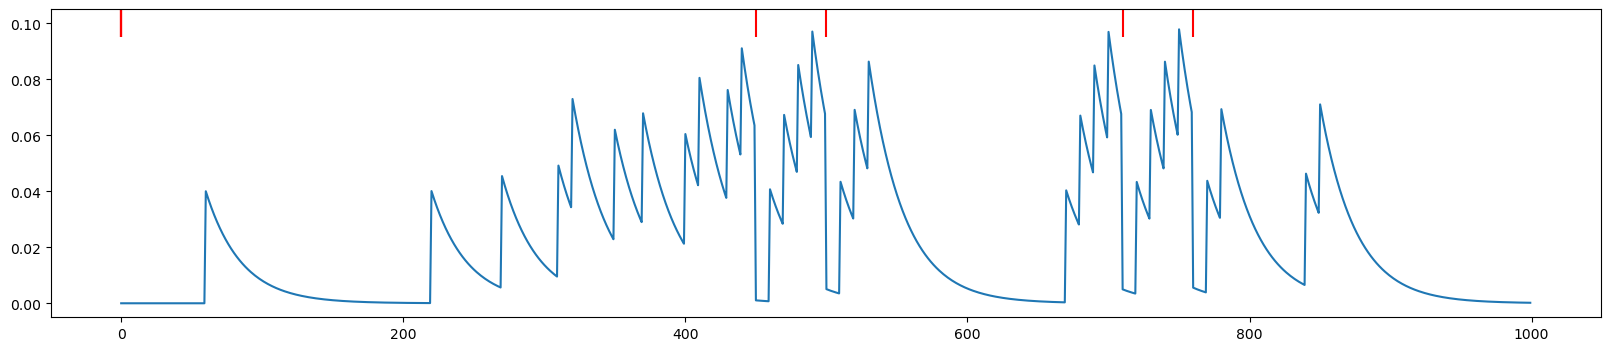

In [6]:
spikes = np.argwhere(zs > 0)
plt.figure(figsize=(20, 4))
plt.plot(vs)
plt.scatter(spikes, np.ones_like(spikes) * 0.1, marker="|", c="red", s=400)
zs = np.array(zs)
zs[zs > 0]
plt.savefig("lif_trace_rockpool.png")

In [7]:
from rockpool.nn.modules import to_nir

nir_graph = to_nir(c, torch.tensor(d[0]), "lif")
nir_graph

/var/folders/w7/dpsq9mj54t7gg3nc3923pc0r0000gn/T/ipykernel_11059/1114895305.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  nir_graph = to_nir(c, torch.tensor(d[0]), "lif")


NIRGraph(nodes={'input': Input(input_type={'input': array([1])}), '0_LinearTorch': Linear(weight=tensor([[0.0400]])), '1_LIFNeuronTorch': LIF(tau=array([0.0025], dtype=float32), r=array([24.019737], dtype=float32), v_leak=array([0.], dtype=float32), v_threshold=array([0.1], dtype=float32)), 'output': Output(output_type={'output': array([1, 1, 1])})}, edges=[('0_LinearTorch', '1_LIFNeuronTorch'), ('1_LIFNeuronTorch', 'output'), ('input', '0_LinearTorch')])

In [8]:
import nir
import importlib
importlib.reload(nir)

<module 'nir' from '/Users/dylan/SynSense Dropbox/Dylan Muir/LiveSync/Development/Projects/nir/nir_GIT/nir/__init__.py'>

In [9]:
nir_graph

NIRGraph(nodes={'input': Input(input_type={'input': array([1])}), '0_LinearTorch': Linear(weight=tensor([[0.0400]])), '1_LIFNeuronTorch': LIF(tau=array([0.0025], dtype=float32), r=array([24.019737], dtype=float32), v_leak=array([0.], dtype=float32), v_threshold=array([0.1], dtype=float32)), 'output': Output(output_type={'output': array([1, 1, 1])})}, edges=[('0_LinearTorch', '1_LIFNeuronTorch'), ('1_LIFNeuronTorch', 'output'), ('input', '0_LinearTorch')])

In [10]:
nir.write("lif_rockpool.nir", nir_graph)

In [11]:
nir.read("lif_rockpool.nir")

NIRGraph(nodes={'0_LinearTorch': Linear(weight=array([[0.04]], dtype=float32)), '1_LIFNeuronTorch': LIF(tau=array([0.0025], dtype=float32), r=array([24.019737], dtype=float32), v_leak=array([0.], dtype=float32), v_threshold=array([0.1], dtype=float32)), 'input': Input(input_type={'input': array([1])}), 'output': Output(output_type={'output': array([1, 1, 1])})}, edges=[('0_LinearTorch', '1_LIFNeuronTorch'), ('1_LIFNeuronTorch', 'output'), ('input', '0_LinearTorch')])